## Function Transformer

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [2]:
df = pd.read_csv("/home/yash/Downloads/Titanic.csv")
df = df[["Survived","Age","Fare"]]
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [3]:
df["Age"] = df["Age"].fillna(df["Age"].mean())
# fill missing value by that's mean

In [4]:
x = df.drop(["Survived"],axis = 1)
y = df["Survived"]

In [5]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)


Text(0.5, 1.0, 'Age QQ Plot')

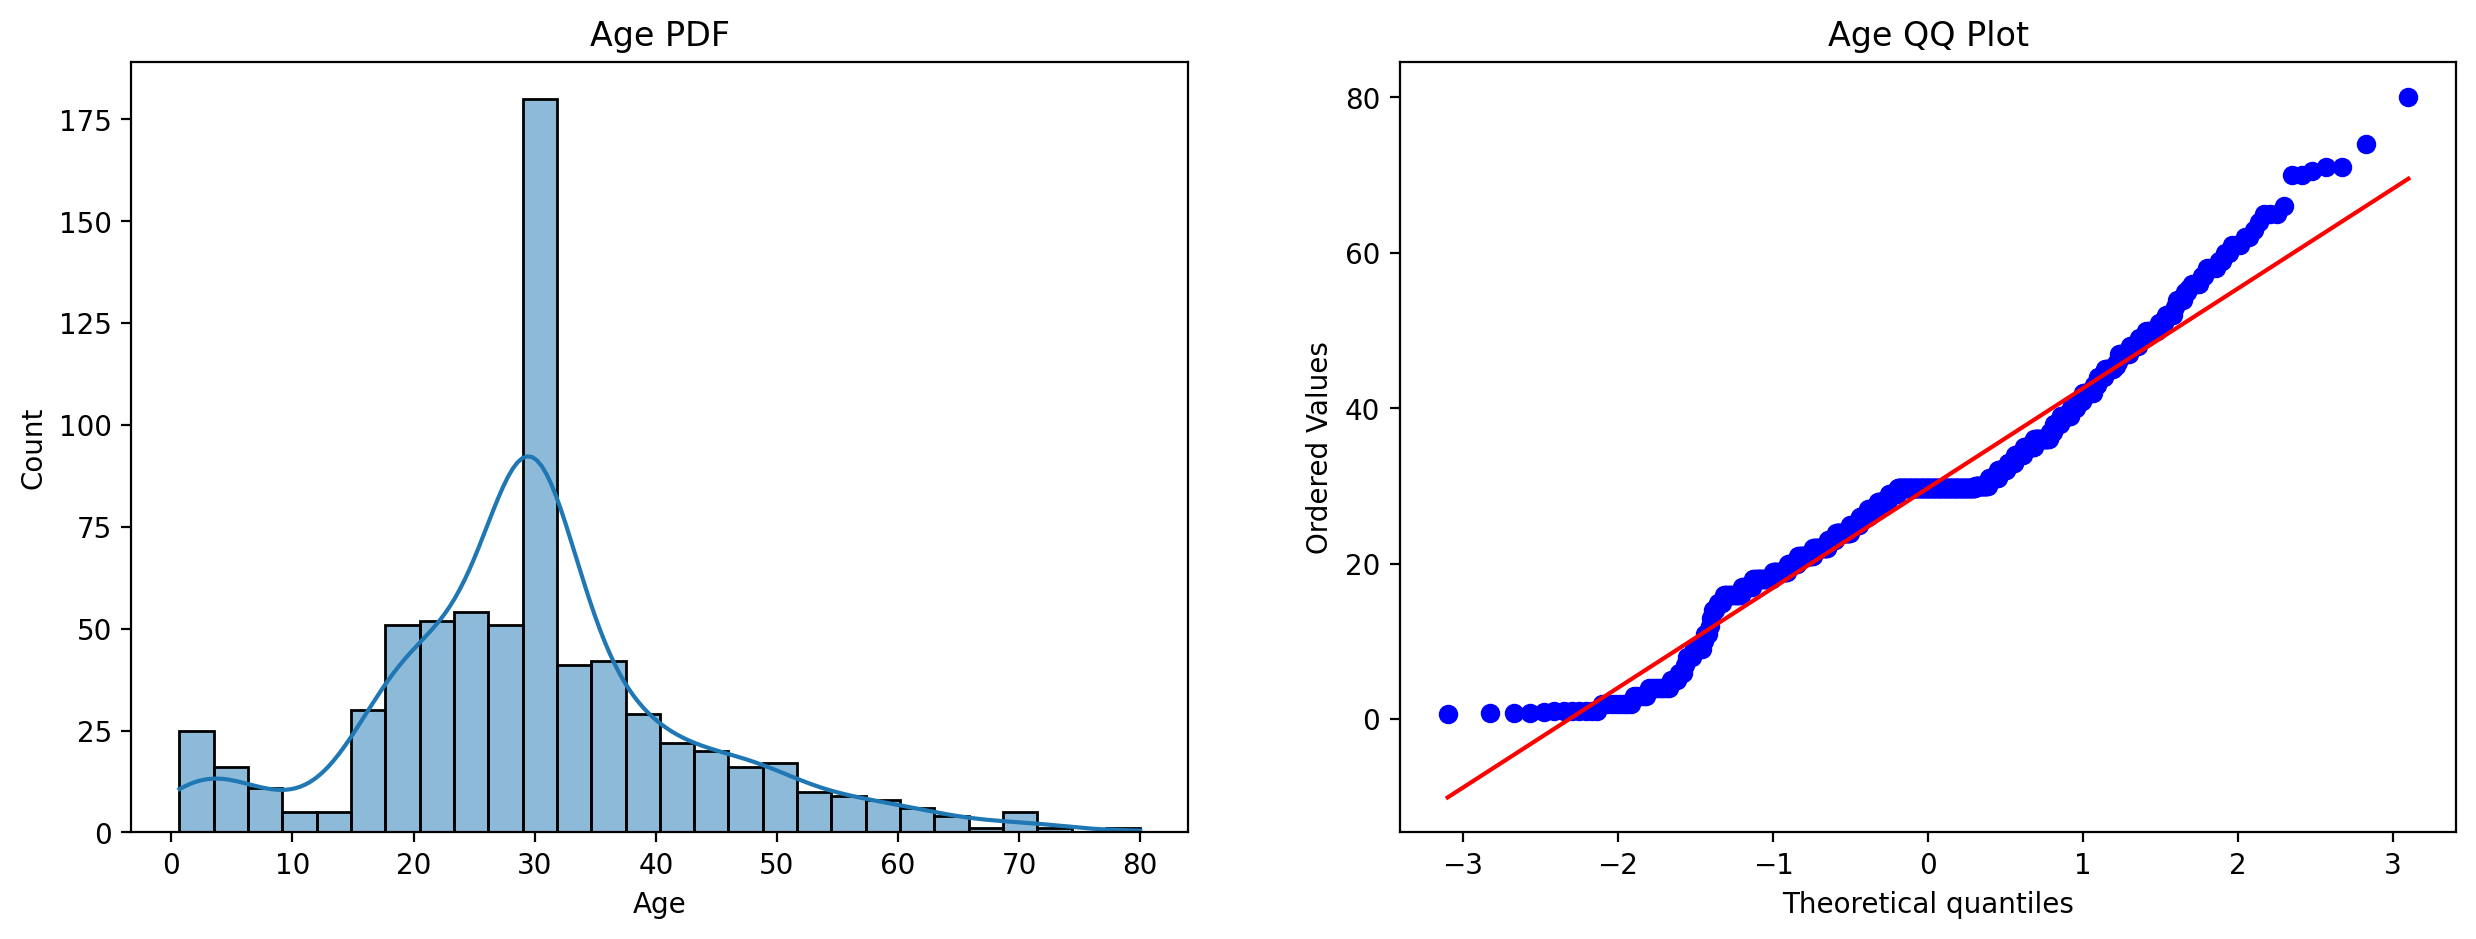

In [6]:
plt.figure(figsize = (15,5),dpi = 200)

plt.subplot(1,2,1)
sns.histplot(x_train["Age"], kde = True)
plt.title("Age PDF")

plt.subplot(1,2,2)
stats.probplot(x_train["Age"],dist = "norm", plot = plt)
plt.title("Age QQ Plot")

Text(0.5, 1.0, 'Fare QQ Plot')

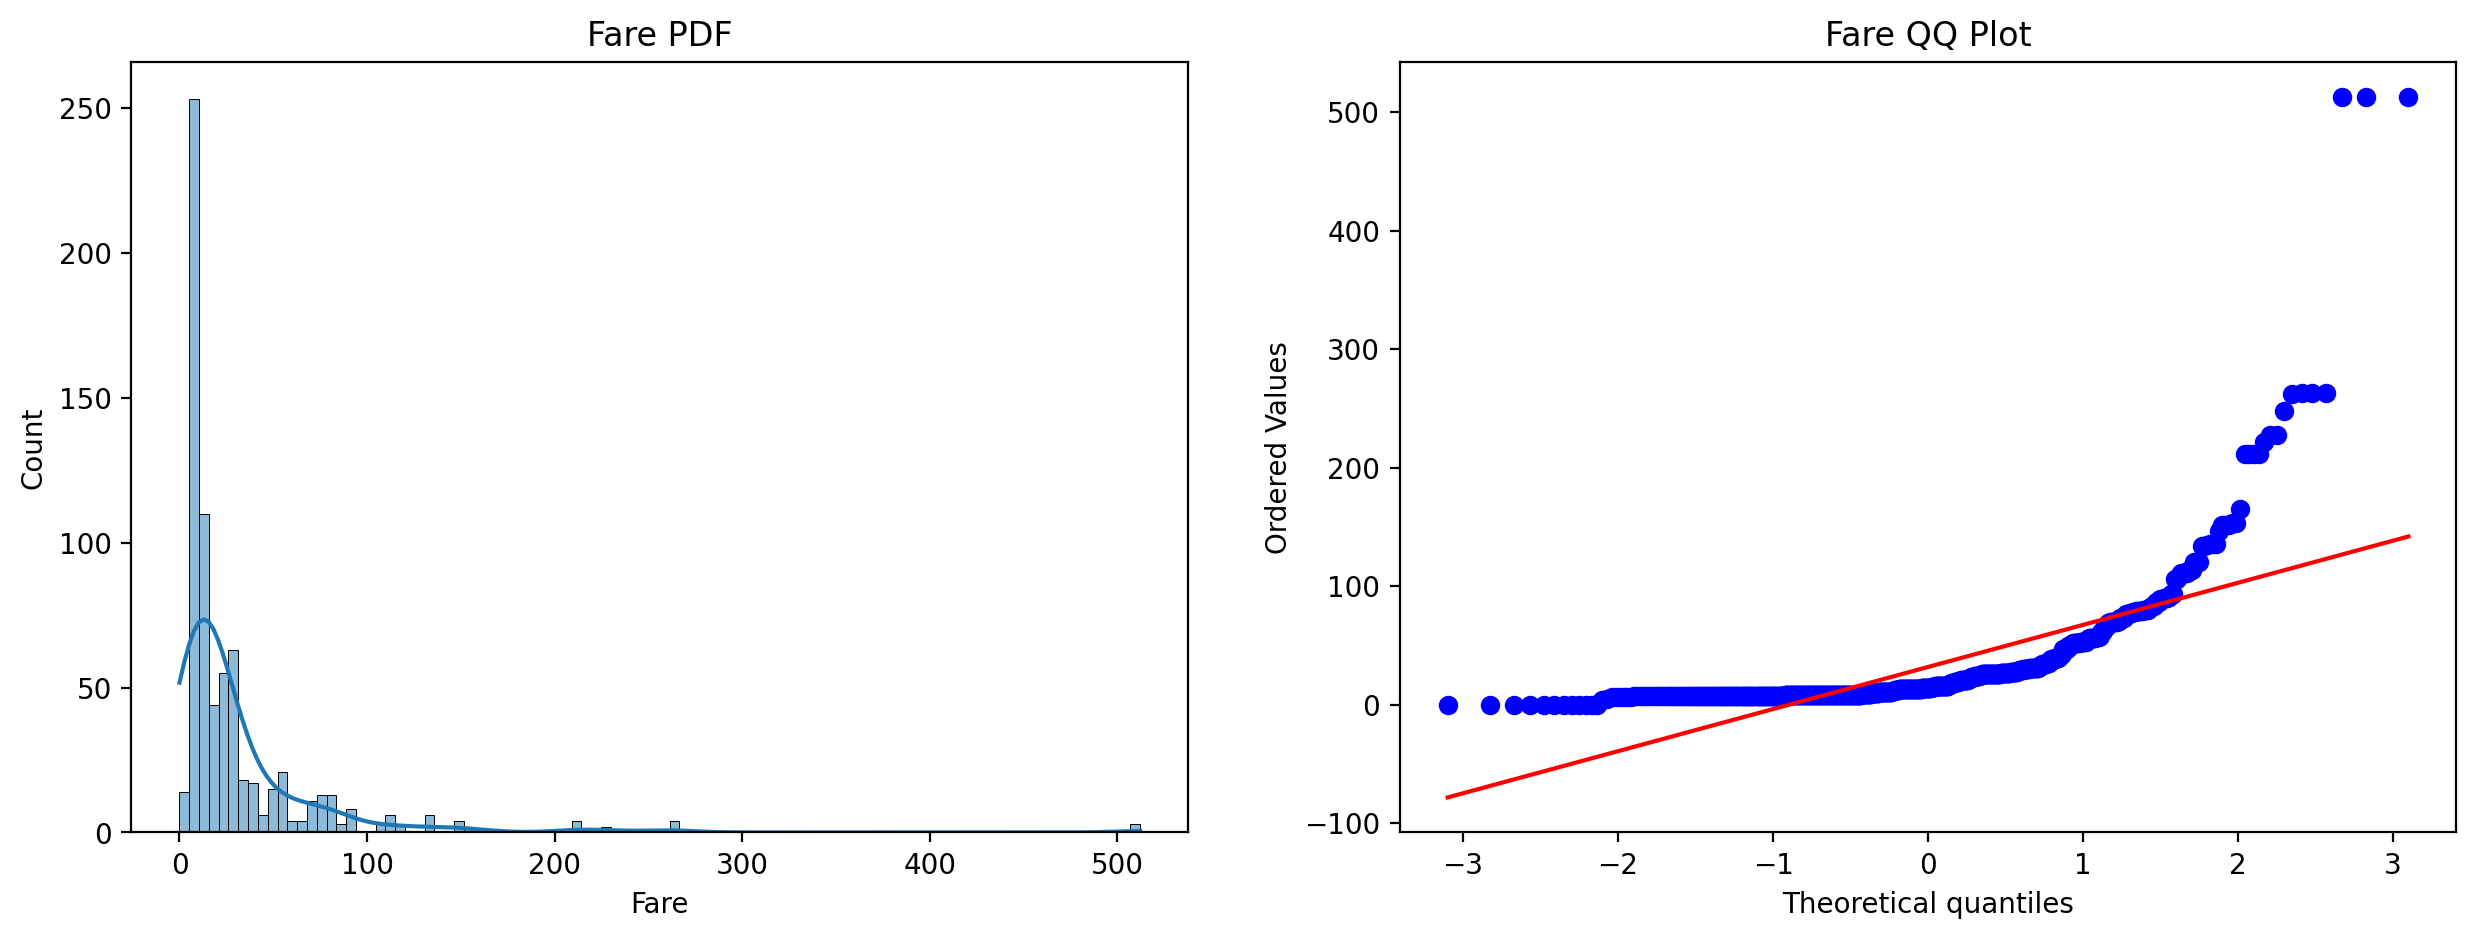

In [7]:
plt.figure(figsize = (15,5),dpi = 200)

plt.subplot(1,2,1)
sns.histplot(x_train["Fare"], kde = True)
plt.title("Fare PDF")

plt.subplot(1,2,2)
stats.probplot(x_train["Fare"],dist = "norm", plot = plt)
plt.title("Fare QQ Plot")

In [8]:
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf1.fit(x_train,y_train)
clf2.fit(x_train,y_train)

y_pred1 = clf1.predict(x_test)
y_pred2 = clf2.predict(x_test)

print("Acuracy Score by LR : ",accuracy_score(y_test,y_pred1)*100,"%")
print("Acuracy Score by DTC : ",accuracy_score(y_test,y_pred2)*100,"%")

Acuracy Score by LR :  69.83240223463687 %
Acuracy Score by DTC :  67.59776536312849 %


### Transform Both Column ( Age , Fare )

In [9]:
trf = FunctionTransformer(func = np.log1p)

trf.fit(x_train)
x_train_trf = trf.transform(x_train)
x_test_trf = trf.transform(x_test)


Text(0.5, 1.0, 'After Transformer Age QQ Plot')

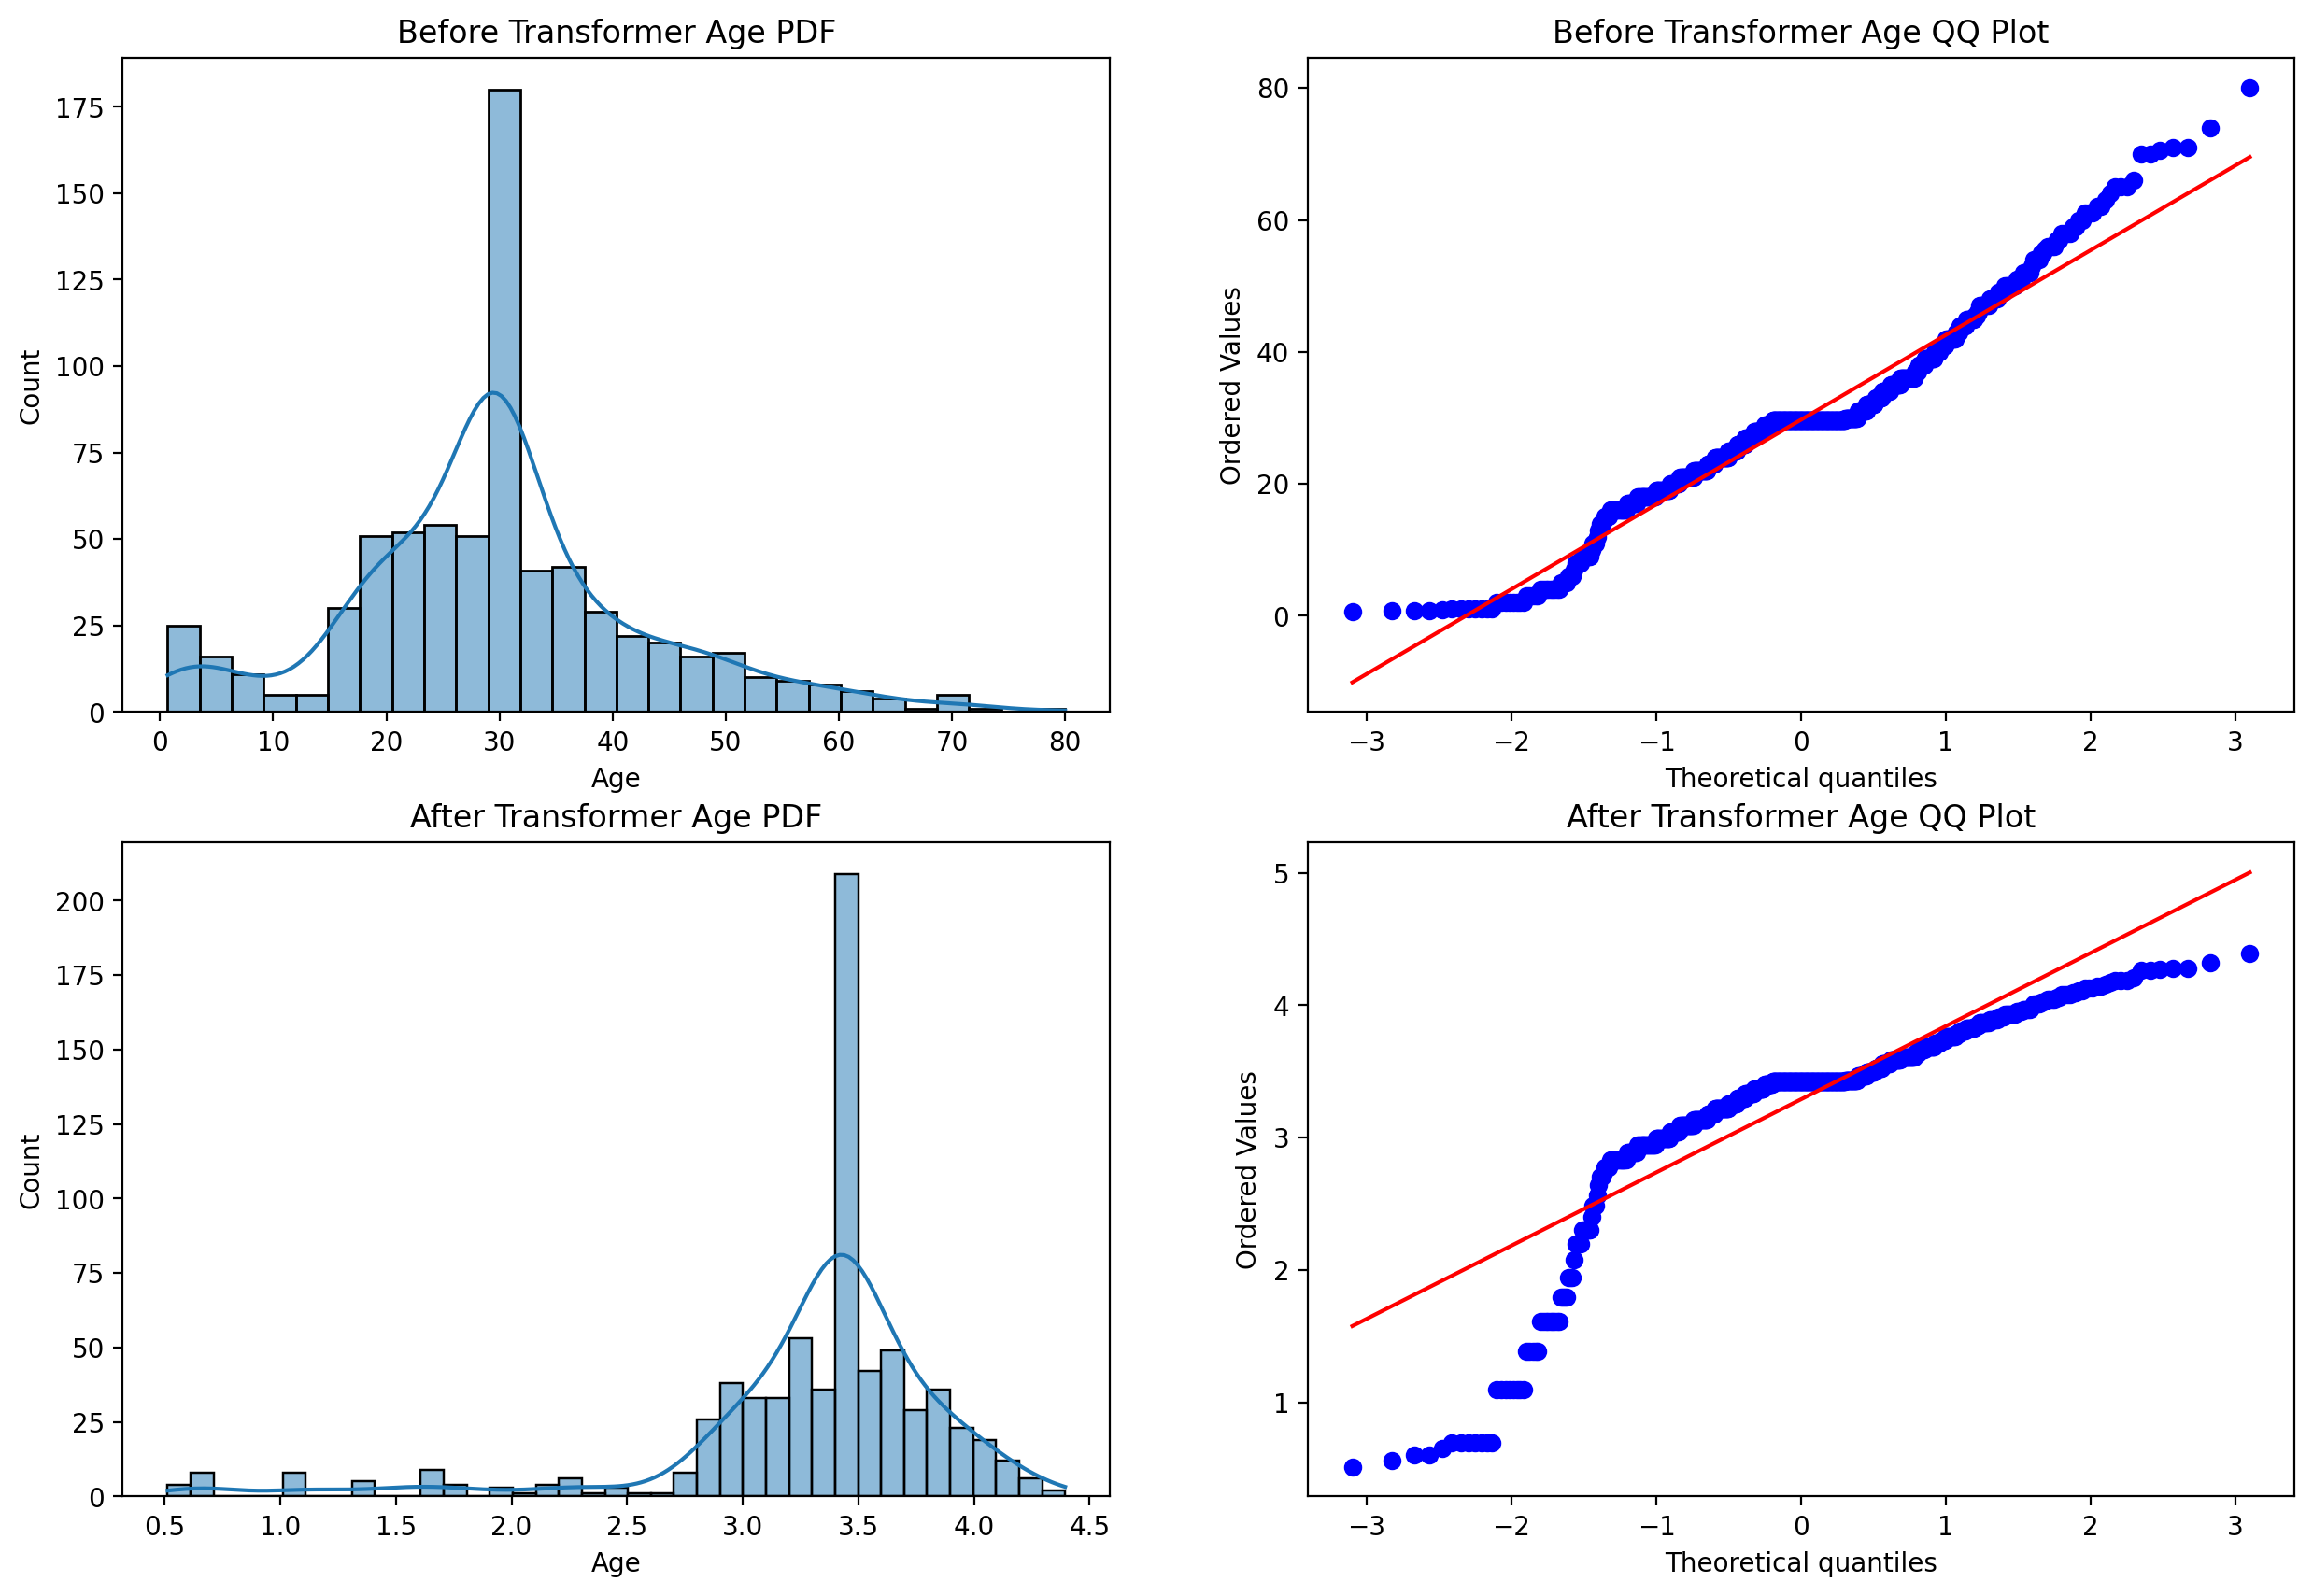

In [10]:
plt.figure(figsize = (15,10),dpi = 200)

plt.subplot(2,2,1)
sns.histplot(x_train["Age"], kde = True)
plt.title("Before Transformer Age PDF")

plt.subplot(2,2,2)
stats.probplot(x_train["Age"],dist = "norm", plot = plt)
plt.title("Before Transformer Age QQ Plot")

plt.subplot(2,2,3)
sns.histplot(x_train_trf["Age"], kde = True)
plt.title("After Transformer Age PDF")

plt.subplot(2,2,4)
stats.probplot(x_train_trf["Age"],dist = "norm", plot = plt)
plt.title("After Transformer Age QQ Plot")


Text(0.5, 1.0, 'After Transformer ssssFare QQ Plot')

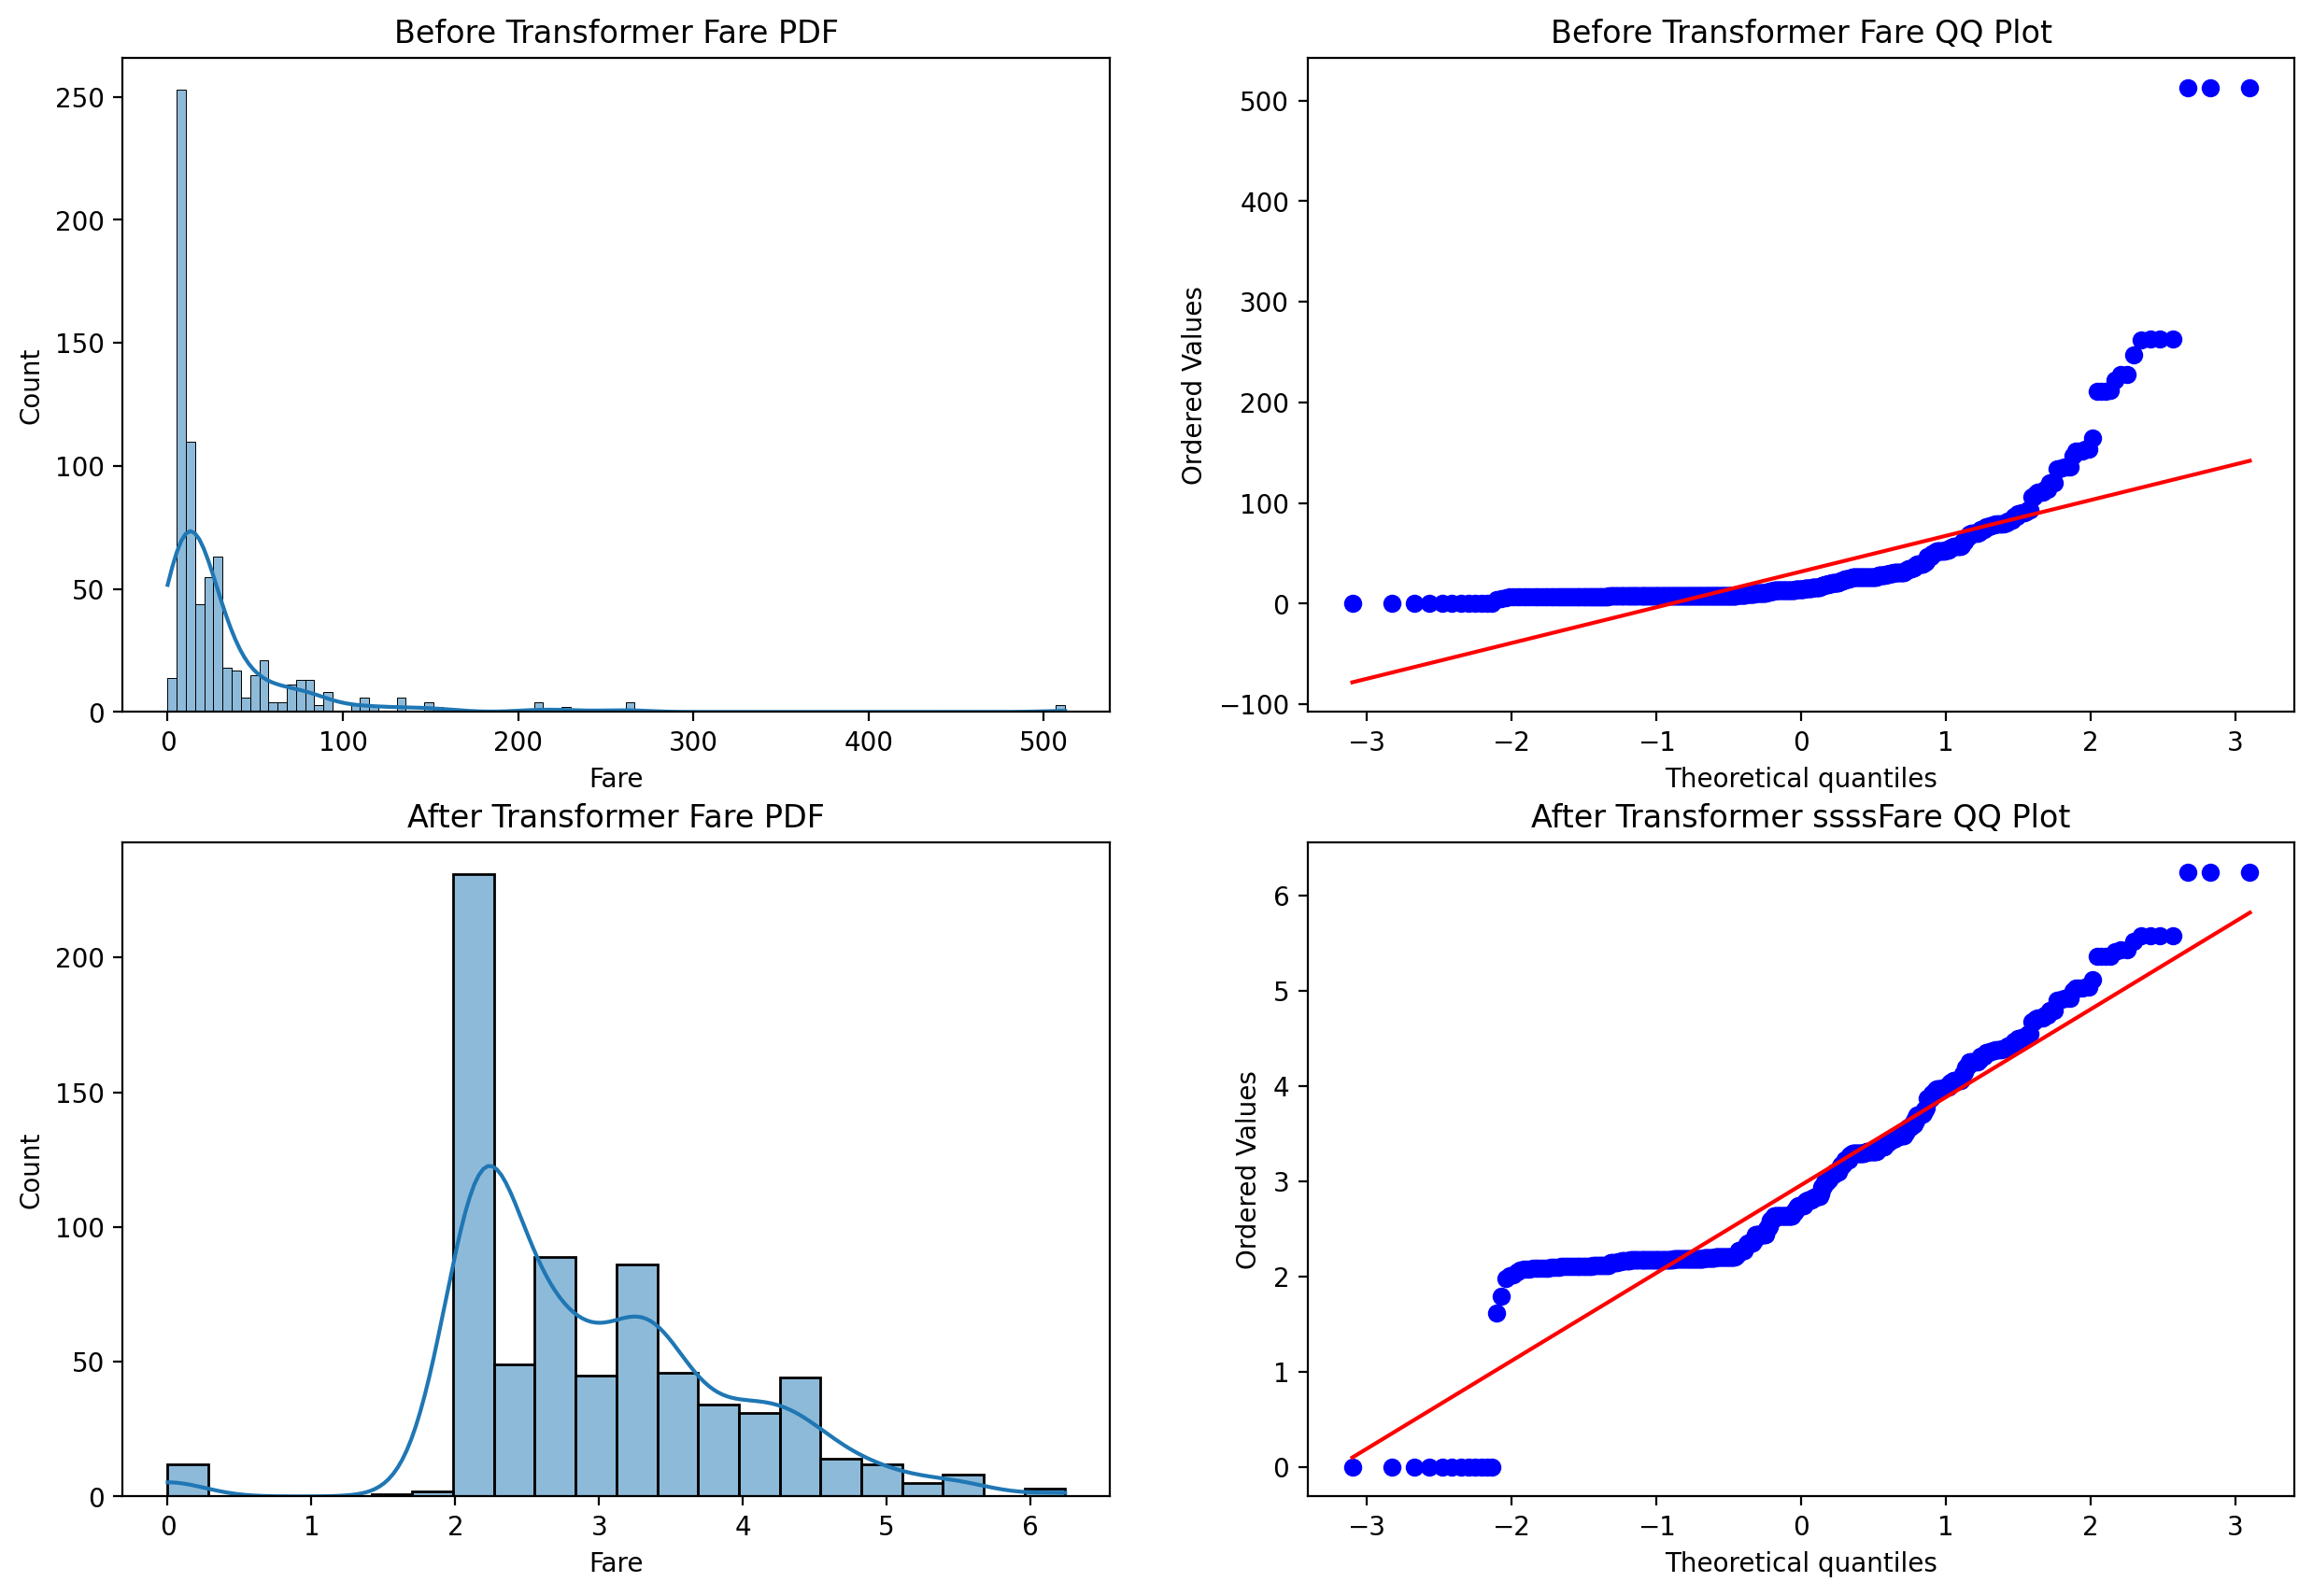

In [11]:
plt.figure(figsize = (15,10),dpi = 200)

plt.subplot(2,2,1)
sns.histplot(x_train["Fare"], kde = True)
plt.title("Before Transformer Fare PDF")

plt.subplot(2,2,2)
stats.probplot(x_train["Fare"],dist = "norm", plot = plt)
plt.title("Before Transformer Fare QQ Plot")

plt.subplot(2,2,3)
sns.histplot(x_train_trf["Fare"], kde = True)
plt.title("After Transformer Fare PDF")

plt.subplot(2,2,4)
stats.probplot(x_train_trf["Fare"],dist = "norm", plot = plt)
plt.title("After Transformer ssssFare QQ Plot")

In [12]:
clf1.fit(x_train_trf,y_train)
clf2.fit(x_train_trf,y_train)

y_pred1 = clf1.predict(x_test_trf)
y_pred2 = clf2.predict(x_test_trf)

print("Acuracy Score After Transformer by LR : ",accuracy_score(y_test,y_pred1)*100,"%")
print("Acuracy Score After Transformer by DTC : ",accuracy_score(y_test,y_pred2)*100,"%")

Acuracy Score After Transformer by LR :  70.39106145251397 %
Acuracy Score After Transformer by DTC :  67.59776536312849 %


### Transform Only Fare Column

In [13]:
trf = ColumnTransformer(transformers = [
    ("Log", FunctionTransformer(func = np.log1p) ,["Fare"])
],remainder = "passthrough")
trf.fit(x_train)
x_train_trf = trf.transform(x_train)
x_test_trf = trf.transform(x_test)

x_train_trf = pd.DataFrame(x_train_trf)
x_train_trf.columns = ["Fare","Age"]

x_test_trf = pd.DataFrame(x_test_trf)
x_test_trf.columns = ["Fare","Age"]

Text(0.5, 1.0, 'After Transformer ssssFare QQ Plot')

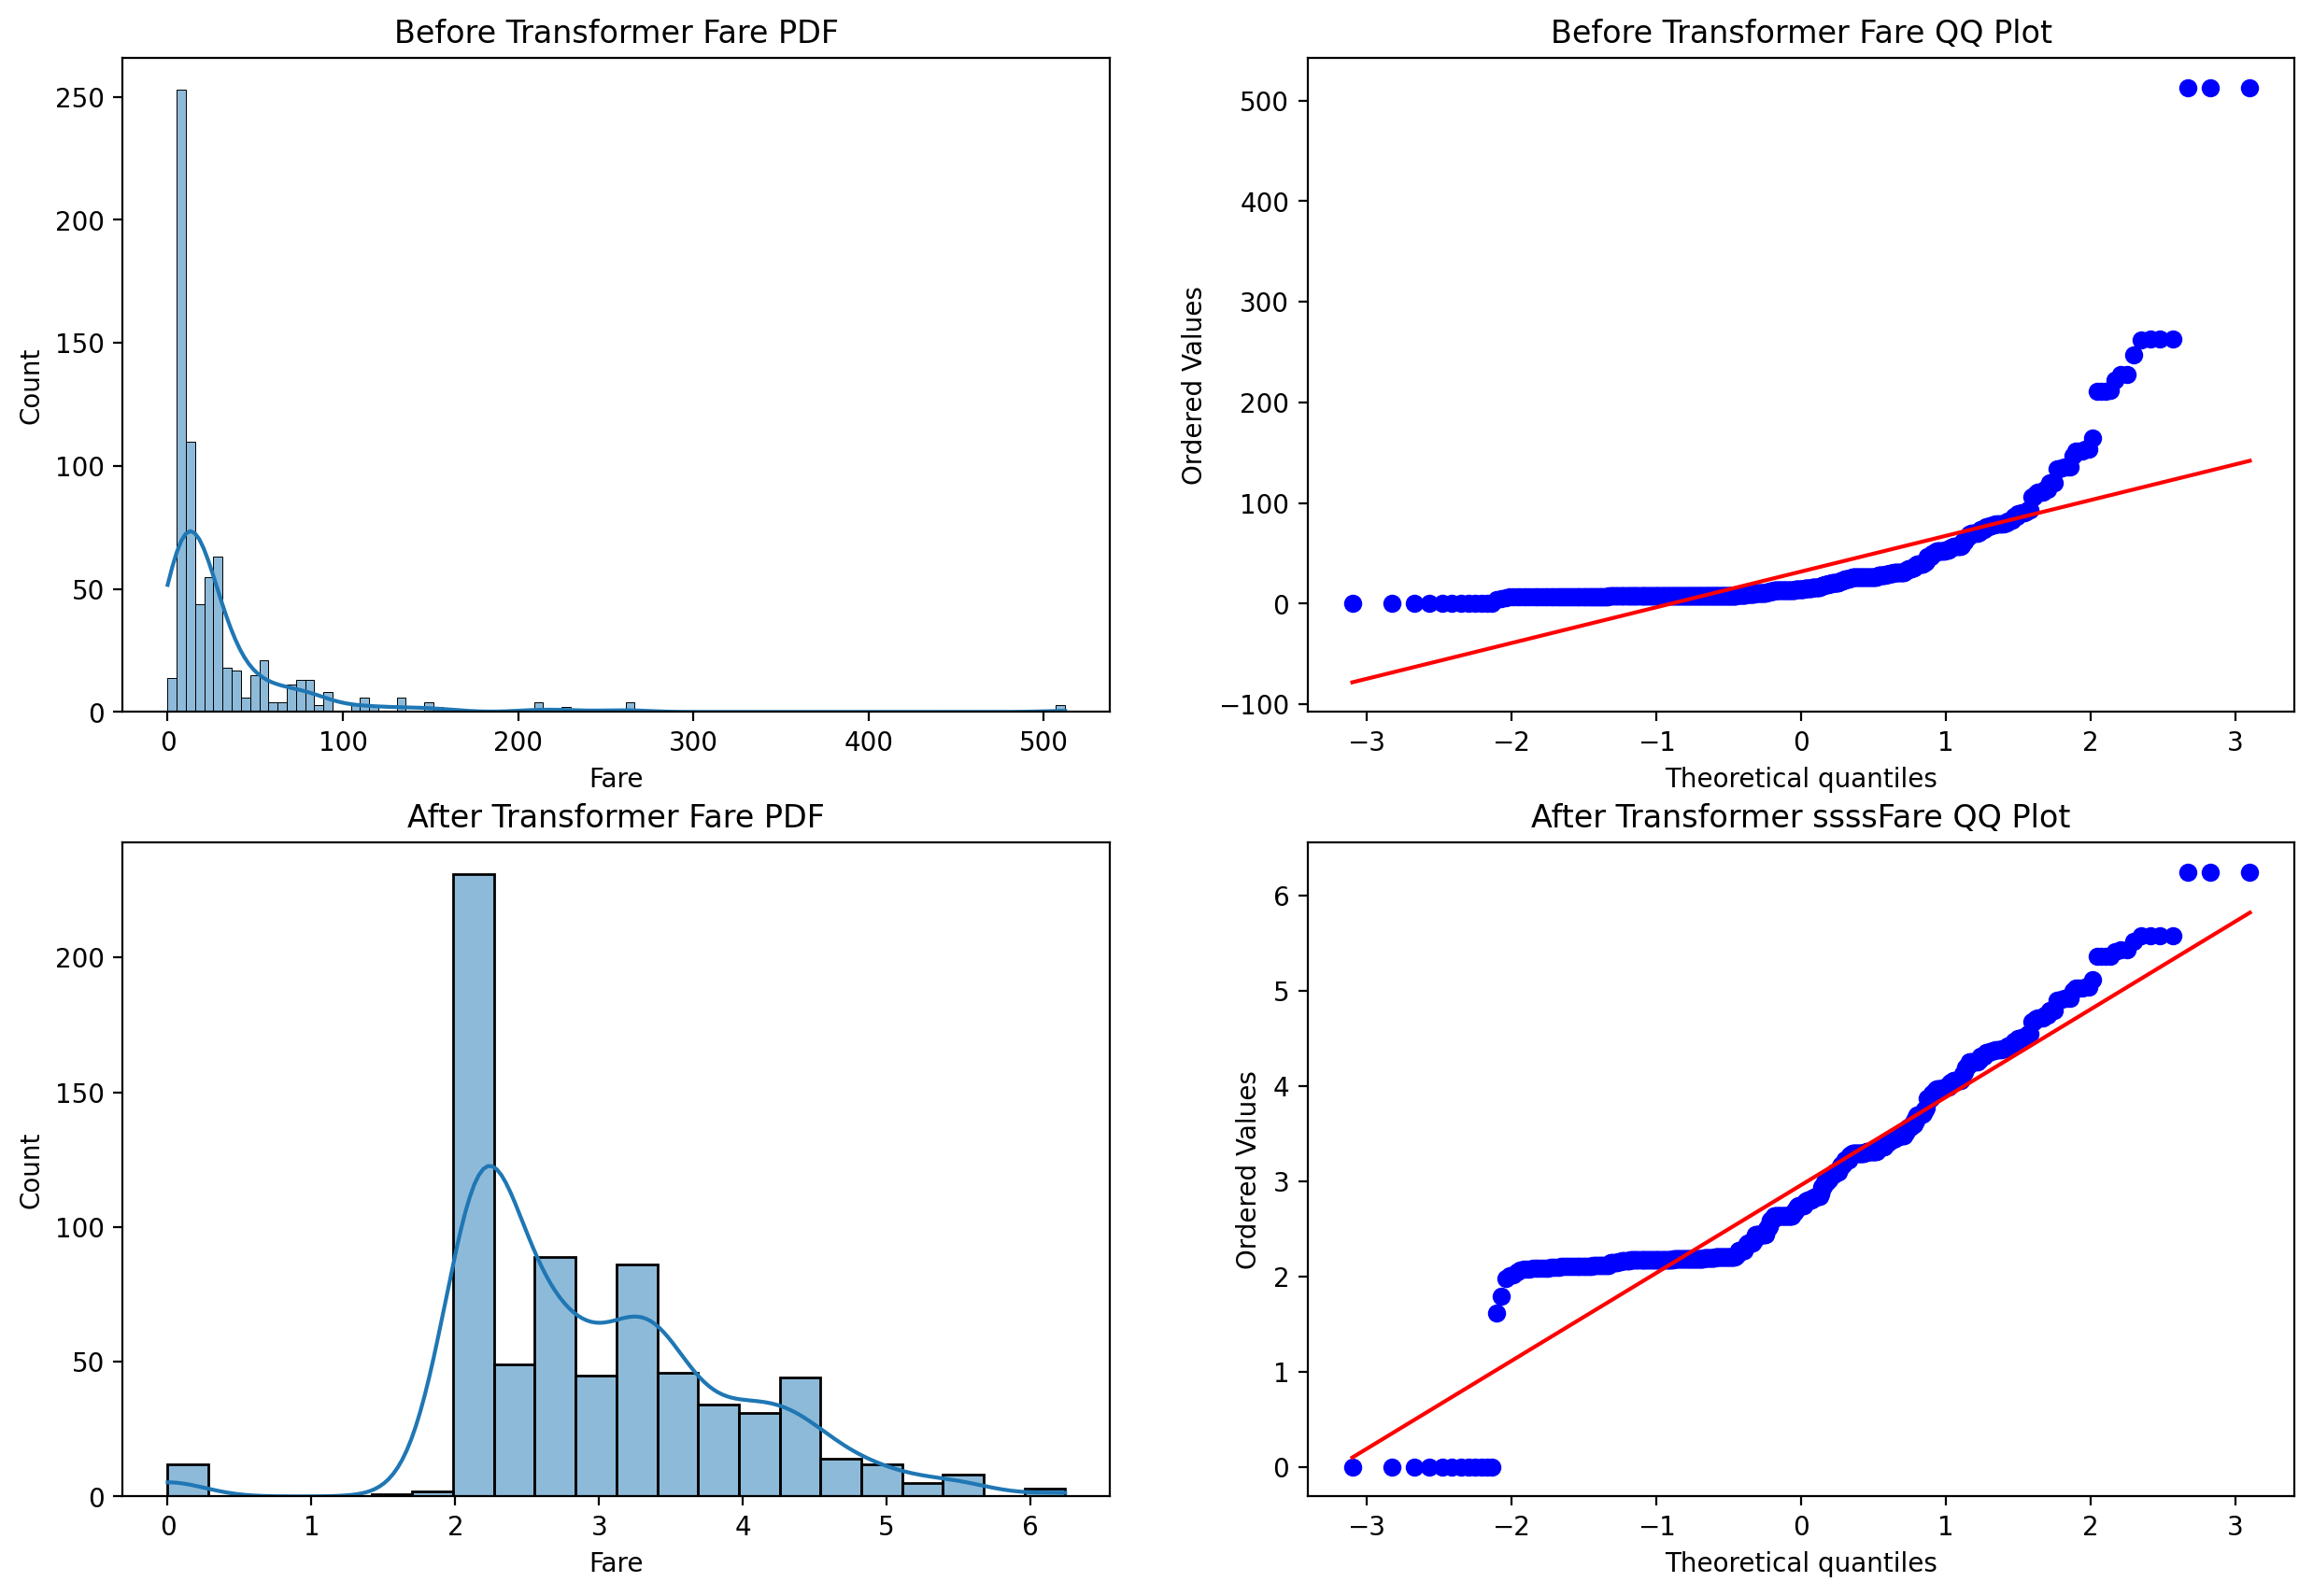

In [14]:
plt.figure(figsize = (15,10),dpi = 200)

plt.subplot(2,2,1)
sns.histplot(x_train["Fare"], kde = True)
plt.title("Before Transformer Fare PDF")

plt.subplot(2,2,2)
stats.probplot(x_train["Fare"],dist = "norm", plot = plt)
plt.title("Before Transformer Fare QQ Plot")

plt.subplot(2,2,3)
sns.histplot(x_train_trf["Fare"], kde = True)
plt.title("After Transformer Fare PDF")

plt.subplot(2,2,4)
stats.probplot(x_train_trf["Fare"],dist = "norm", plot = plt)
plt.title("After Transformer ssssFare QQ Plot")

In [15]:
clf1.fit(x_train_trf,y_train)
clf2.fit(x_train_trf,y_train)

y_pred1 = clf1.predict(x_test_trf)
y_pred2 = clf2.predict(x_test_trf)

print("Acuracy Score After Transformer(Only Fare) by LR : ",accuracy_score(y_test,y_pred1)*100,"%")
print("Acuracy Score After Transformer(Only Fare) by DTC : ",accuracy_score(y_test,y_pred2)*100,"%")

Acuracy Score After Transformer(Only Fare) by LR :  68.15642458100558 %
Acuracy Score After Transformer(Only Fare) by DTC :  67.59776536312849 %
